https://medium.com/@gozdebarin/exploratory-data-analysis-for-data-scientists-59e69cb11e7e

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data

path = 'heart.csv'
heart = pd.read_csv(path)

# check first five rows:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# check the features
heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [3]:
# check the shape (size) of dataset
print(f'The dataset contains {heart.shape[0]} Rows and {heart.shape[1]} Columns')

The dataset contains 303 Rows and 14 Columns


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# check if there are any Null values
heart.isnull().sum().sort_values(ascending=False).head(11)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
dtype: int64

In [6]:
heart.duplicated().sum()

1

In [7]:
heart.drop_duplicates(keep='first',inplace=True)

In [8]:
heart.duplicated().sum()

0

In [9]:
# getting the statistical summary of dataset
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [10]:
# distribution of the target column
heart['output'].value_counts()

output
1    164
0    138
Name: count, dtype: int64

In [11]:
# distribution of the target column by mean
heart.groupby('output').mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [14]:
import numpy as np
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=heart[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(heart)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.305%
Column chol outliers = 5 => 1.656%
Column thalachh outliers = 1 => 0.331%
Column oldpeak outliers = 8 => 2.649%


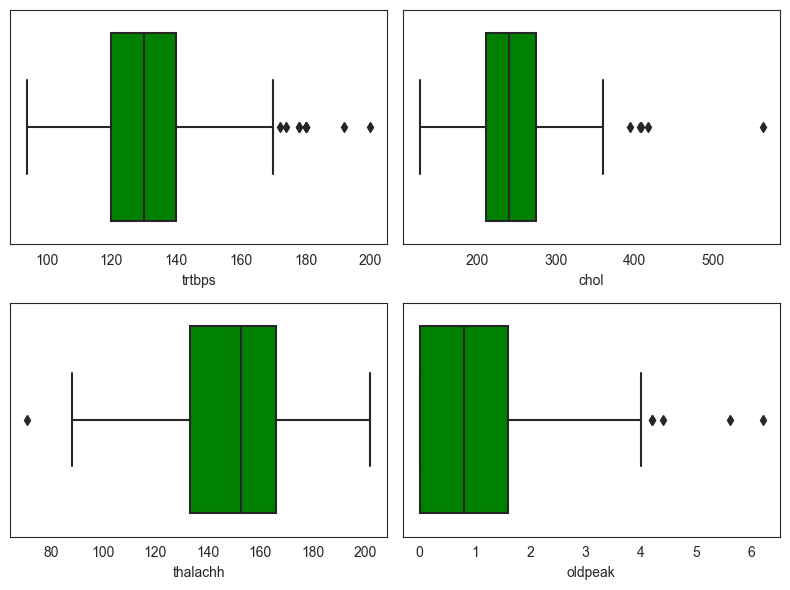

Outliers Present at position: 

trtbps: (array([  8, 101, 110, 152, 194, 202, 222, 227, 240, 247, 259, 265, 291],
      dtype=int64),)
chol: (array([ 28,  85,  96, 219, 245], dtype=int64),)
thalachh: (array([271], dtype=int64),)
oldpeak: (array([101, 203, 220, 249, 290], dtype=int64),)


In [18]:
sns.set_style("white")

fig, ax1 = plt.subplots(2,2, figsize=(8,6))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=heart,x=heart[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="green")
        k+=1
plt.tight_layout()
plt.show()

# display the position of outliers
print("Outliers Present at position: \n")
print("trtbps: {}".format(np.where(heart['trtbps']>165)))
print("chol: {}".format(np.where(heart['chol']>360)))
print("thalachh: {}".format(np.where(heart['thalachh']<80)))
print("oldpeak: {}".format(np.where(heart['oldpeak']>4)))

In [21]:
# using log transformation
heart["trtbps"]= np.log(heart.trtbps)
heart["oldpeak"]= np.log(heart.oldpeak)

print("---Log Transform performed---")

# outliers again
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=heart[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        #print(v_col)
        perc = np.shape(v_col)[0] * 100.0 / np.shape(heart)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

---Log Transform performed---
Column age outliers = 0 => 0.0%
Column trtbps outliers = 7 => 2.318%
Column chol outliers = 5 => 1.656%
Column thalachh outliers = 1 => 0.331%
Column oldpeak outliers = 0 => 0.0%


C:\Users\mbieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
